In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/SL LABS/CA3/crypto-markets.csv')

In [3]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [4]:
df.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1622.0,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1823.0,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1913.0,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1788.0,0.4421,3124.52
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


In [5]:
btc=df[df['symbol']=='BTC']#Extracting the bitcoin data from the dataframe
btc.drop(['volume','symbol','name','ranknow','market','close_ratio','spread','slug'],axis=1,inplace=True)#Just dropping columns here!

In [6]:
btc.head()

,date,open,high,low,close
0,2013-04-28,135.30,135.98,132.10,134.21
1,2013-04-29,134.44,147.49,134.00,144.54
2,2013-04-30,144.00,146.93,134.05,139.00
3,2013-05-01,139.00,139.89,107.72,116.99
4,2013-05-02,116.38,125.60,92.28,105.21


In [9]:
btc.isnull().any()

date            False
open            False
high            False
low             False
close           False
ohlc_average    False
dtype: bool

In [10]:
#I will be adding a feature to improve the model.

btc['ohlc_average'] = (btc['open'] + btc['high'] + btc['low'] + btc['close']) / 4

In [11]:
btc.head()

,date,open,high,low,close,ohlc_average
0,2013-04-28,135.30,135.98,132.10,134.21,134.3975
1,2013-04-29,134.44,147.49,134.00,144.54,140.1175
2,2013-04-30,144.00,146.93,134.05,139.00,140.9950
3,2013-05-01,139.00,139.89,107.72,116.99,125.9000
4,2013-05-02,116.38,125.60,92.28,105.21,109.8675


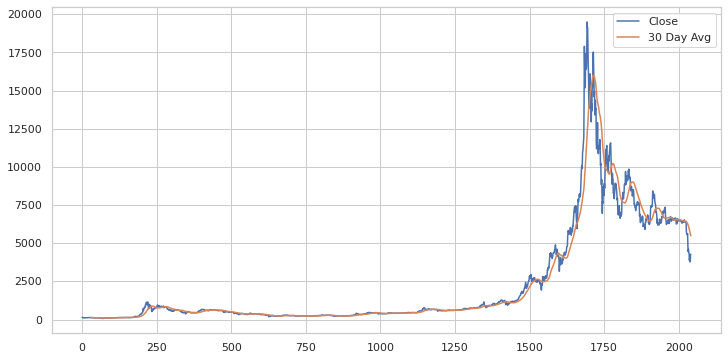

In [12]:
# stock market graph and get surprised of Bitcoin's huge growth

sns.set()
sns.set_style('whitegrid')
btc['close'].plot(figsize=(12,6),label='Close')
btc['close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the rolling 30 day average against the Close Price
plt.legend()

In [17]:
btc["close_nextday"] = btc["close"].shift(periods = -1, fill_value = 0)

In [20]:
X = btc[["open", "close", "high", "low"]]
y = btc[["close_nextday"]]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
accuracy = lr.score(X_train, y_train) * 100
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 99.57517450211711 %
